In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
ls

Untitled.ipynb        sampleSubmission.csv* train.csv*
Untitled1.ipynb       test.csv*


## load the data frame
### train set has 12 columns and 10886 rows

In [3]:
df = pd.read_csv('train.csv')
pd.set_option('display.max_rows',4)

#### data frame

In [4]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
...,...,...,...,...,...,...,...,...,...,...,...,...
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [5]:
data = pd.read_csv('sampleSubmission.csv')

In [6]:
df.shape

(10886, 12)

In [7]:
data.shape

(6493, 2)

#### change to numpy array

In [8]:
data_np_array =  np.array(df)

In [9]:
data_np_array.shape

(10886, 12)

In [10]:
data_np_array[:,11]

array([16, 40, 32, ..., 168, 129, 88], dtype=object)

#### 12 columns for training set

In [11]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

## demand vary with season

In [12]:
season_data = np.array(df['season'])
season_data.shape

(10886,)

In [13]:
season_count = np.zeros(4)
for i in range(4):
    season_count[i] = np.sum(season_data == (i+1))
season_count

array([2686., 2733., 2733., 2734.])

In [14]:
season = np.array(['Spring', 'Summer', 'autumn', 'winter'])
season_number = np.array([1,2,3,4])

#### apply linear regression

In [15]:
k, b = np.polyfit(season_number,season_count,deg=1)
linear_regression = k * season_number + b

#### plot bar and box

Text(0.5,1,'box')

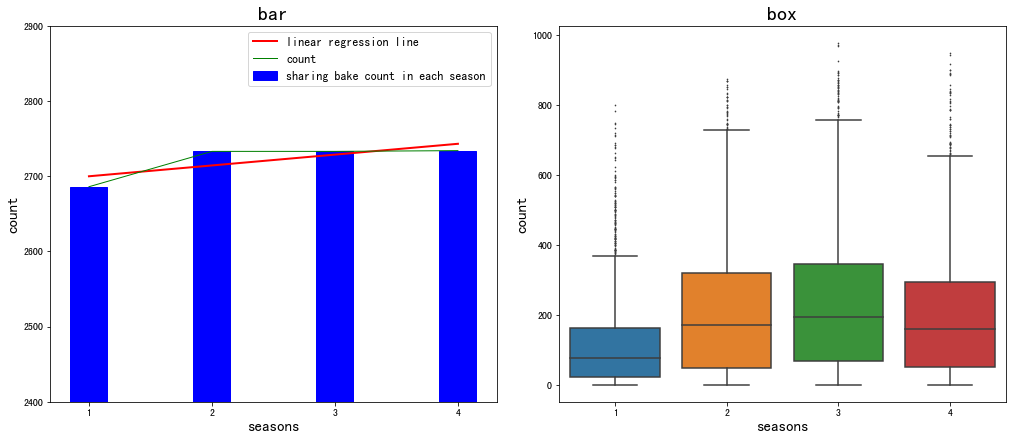

In [166]:
cols = 2
rows = 1
figsize = (14, 6)
fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs[0].bar(season_number,height = season_count,width = 0.3,color = 'blue', label = 'sharing bake count in each season',edgecolor = 'blue')
axs[0].plot(season_number, linear_regression,c = 'red',label = 'linear regression line',linewidth = 2)
axs[0].plot(season_number,season_count,c = 'green',label = 'count',linewidth = 1)
axs[0].legend(loc = 1,fontsize =12)
axs[0].set_ylim(2400,2900)
axs[0].set_xlabel('seasons',fontsize = 15)
axs[0].set_xticks([1,2,3,4])
axs[0].set_ylabel('count',fontsize = 15)
sns.boxplot(x='season', y='count', data=df, fliersize = 0.8)
axs[0].legend(loc = 1,fontsize =12)
axs[1].set_xlabel('seasons',fontsize = 15)
axs[1].set_ylabel('count',fontsize = 15)
axs[0].set_title('bar',fontsize = 20)
axs[1].set_title('box',fontsize = 20)

we can see from above, the demand of sharing bake change very little from seasons

### Convert the format and extract the hours, weeks, months add 4 items to the dataframe

In [88]:
df = pd.read_csv('train.csv')

#Convert the format and extract the hours, weeks, months
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df.datetime.dt.hour
df['week'] = df.datetime.dt.dayofweek
df['month'] = df.datetime.dt.month
df['year_month'] = df.datetime.dt.strftime('%Y-%m')
df['date'] = df.datetime.dt.date
#delete datetime
df.drop('datetime', axis = 1, inplace = True)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,week,month,year_month,date
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,5,1,2011-01,2011-01-01
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,5,1,2011-01,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,2,12,2012-12,2012-12-19
10885,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23,2,12,2012-12,2012-12-19


## demand vary with month

### year month

In [18]:
month_data = np.array(df['month'])
month_data.shape

(10886,)

In [19]:
month_count = np.zeros(12)
for i in range(12):
    month_count[i] = np.sum(month_data == (i+1))
month_count

array([884., 901., 901., 909., 912., 912., 912., 912., 909., 911., 911.,
       912.])

In [20]:
month_number = np.linspace(1,12,12).astype(int)
month_number

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [21]:
k, b = np.polyfit(month_number,month_count,deg=1)
linear_regression_month = k * month_number + b

Text(0.5,1,'box')

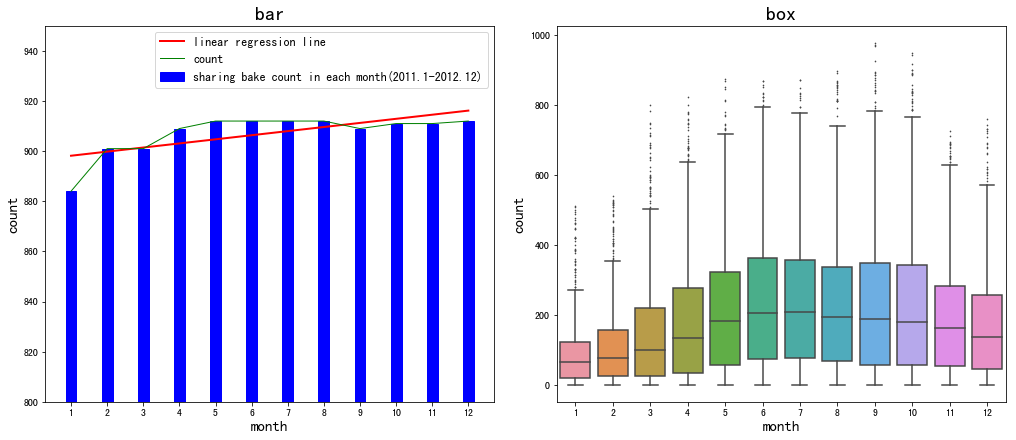

In [181]:
cols = 2
rows = 1
figsize = (14, 6)
fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs[0].bar(month_number,height = month_count,width = 0.3,color = 'blue', label = 'sharing bake count in each month(2011.1-2012.12)',edgecolor = 'blue')
axs[0].plot(month_number, linear_regression_month,c = 'red',label = 'linear regression line', linewidth = 2)
axs[0].plot(month_number,month_count,c = 'green',label = 'count',linewidth = 1)
axs[0].legend(loc = 1,fontsize =12)
axs[0].set_ylim(800,950)
axs[0].set_xlabel('month',fontsize = 15)
axs[0].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
axs[0].set_ylabel('count',fontsize = 15)
sns.boxplot(x='month', y='count', data=df,fliersize = 0.8)
axs[0].legend(loc = 1,fontsize =12)
axs[1].set_xlabel('month',fontsize = 15)
axs[1].set_ylabel('count',fontsize = 15)
axs[0].set_title('bar',fontsize = 20)
axs[1].set_title('box',fontsize = 20)

#### from above, we can see

## 2011 - 2012

In [58]:
group_by_date = df.groupby('date').mean()
group_by_month = df.groupby('year_month').mean()

In [24]:
group_by_date

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,week,month
date,,,,,,,,,,,,,,
2011-01-01,1.0,0.0,0.0,1.583333,14.110833,18.181250,80.583333,10.749871,13.791667,27.250000,41.041667,11.500000,5.0,1.0
2011-01-02,1.0,0.0,0.0,1.956522,14.902609,17.686957,69.608696,16.652122,5.695652,29.130435,34.826087,11.782609,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-18,4.0,0.0,1.0,1.208333,16.844167,20.485417,66.625000,14.834079,18.041667,213.500000,231.541667,11.500000,1.0,12.0
2012-12-19,4.0,0.0,1.0,1.000000,13.632500,17.108125,62.541667,12.334142,13.875000,205.583333,219.458333,11.500000,2.0,12.0


In [125]:
import datetime
tmp = []
for i in range(12):
    tmp.append(datetime.date(2011,i+1,15))   
for i in range(12):
    tmp.append(datetime.date(2012,i+1,15))
month_year = np.array(tmp)

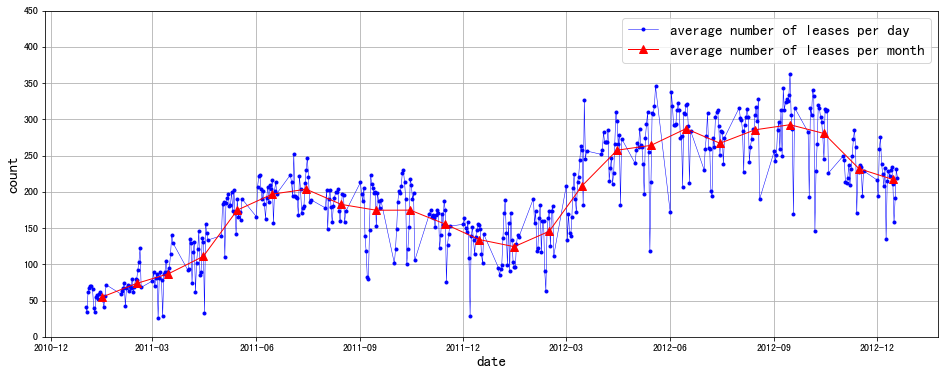

In [183]:
plt.figure(figsize=(16,6))
plt.plot(np.array(group_by_date.index), group_by_date['count'], label = 'average number of leases per day',linestyle='-', marker = 'o', linewidth = 0.5, markersize = 3, color = 'blue')
plt.plot(month_year, group_by_month['count'], label = 'average number of leases per month',linestyle='-', marker = '^', linewidth = 1, markersize = 8, color = 'red')
plt.legend(loc =1 , fontsize =15)
plt.ylim(0,450)
plt.xlabel('date',fontsize =15)
plt.ylabel('count',fontsize =15)
plt.grid()

Text(0.5,1,'total count')

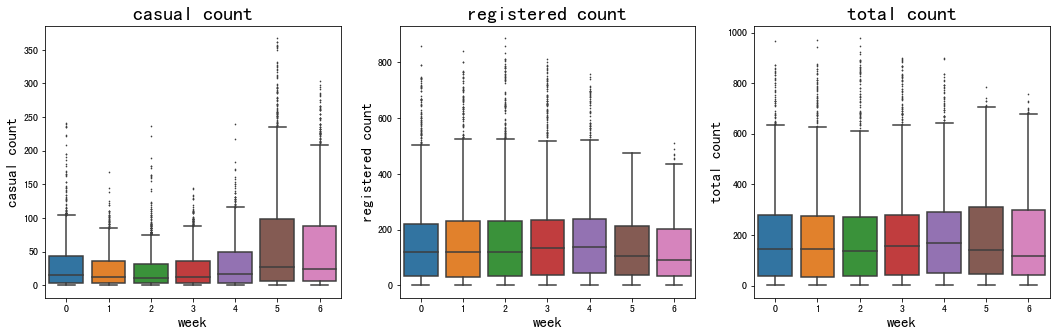

In [168]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
sns.boxplot(x="week",y='casual' ,data=df,ax=axes[0],fliersize = 0.8)
sns.boxplot(x='week',y='registered', data=df, ax=axes[1],fliersize = 0.8)
sns.boxplot(x='week',y='count', data=df, ax=axes[2],fliersize = 0.8)
axes[0].set_xlabel('week', fontsize = 15)
axes[1].set_xlabel('week', fontsize = 15)
axes[2].set_xlabel('week', fontsize = 15)
axes[0].set_ylabel('casual count', fontsize = 15)
axes[1].set_ylabel('registered count', fontsize = 15)
axes[2].set_ylabel('total count', fontsize = 15)
axes[0].set_title('casual count', fontsize = 20)
axes[1].set_title('registered count', fontsize = 20)
axes[2].set_title('total count', fontsize = 20)

Text(0,0.5,'total count')

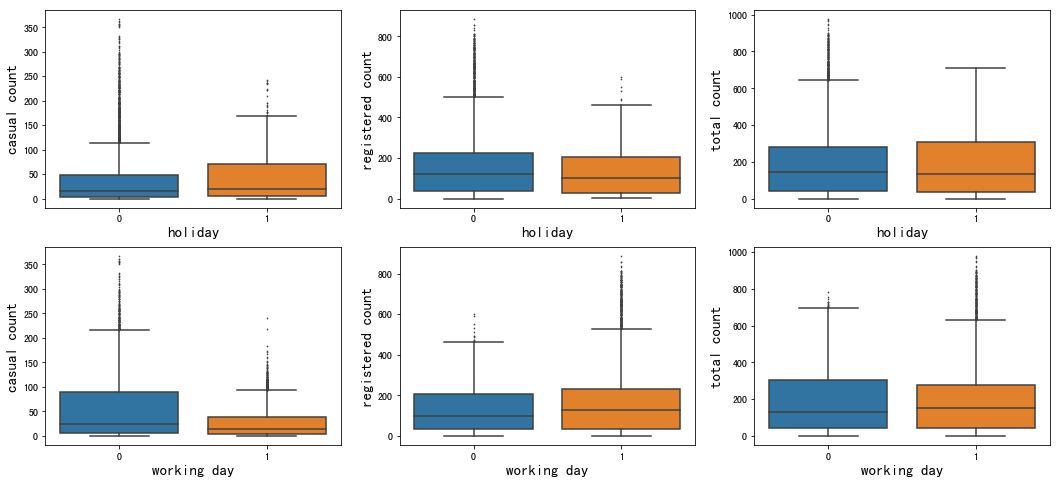

In [179]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
sns.boxplot(x='holiday', y='casual', data=df, ax=axes[0][0],fliersize = 0.8)
sns.boxplot(x='holiday', y='registered', data=df, ax=axes[0][1],fliersize = 0.8)
sns.boxplot(x='holiday', y='count', data=df, ax=axes[0][2],fliersize = 0.8)
sns.boxplot(x='workingday', y='casual', data=df, ax=axes[1][0],fliersize = 0.8)
sns.boxplot(x='workingday', y='registered', data=df, ax=axes[1][1],fliersize = 0.8)
sns.boxplot(x='workingday', y='count', data=df, ax=axes[1][2],fliersize = 0.8)
axes[0][0].set_xlabel('holiday', fontsize = 15)
axes[0][1].set_xlabel('holiday', fontsize = 15)
axes[0][2].set_xlabel('holiday', fontsize = 15)
axes[1][0].set_xlabel('working day', fontsize = 15)
axes[1][1].set_xlabel('working day', fontsize = 15)
axes[1][2].set_xlabel('working day', fontsize = 15)
axes[0][0].set_ylabel('casual count', fontsize = 15)
axes[0][1].set_ylabel('registered count', fontsize = 15)
axes[0][2].set_ylabel('total count', fontsize = 15)
axes[1][0].set_ylabel('casual count', fontsize = 15)
axes[1][1].set_ylabel('registered count', fontsize = 15)
axes[1][2].set_ylabel('total count', fontsize = 15)